## Pytorch Workflow

This notebook explores the basic PyTorch workflow. We test alternative ways to code a simple linear regression model in PyTorch.



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check version
torch.__version__

'2.1.0+cu121'

In [ ]:
# Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device:{device}")

Using device:cpu


In [ ]:
# Preparing and loading data

weight = 0.7
bias = 0.3

# Create synthetic data

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X.shape,y.shape


(torch.Size([50, 1]), torch.Size([50, 1]))

In [ ]:
# Train/Test split

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# Visualisation

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """ Plots training and test data and compares predictions."""

  plt.figure(figsize=(10,7))

  # Training data in blue

  plt.scatter(train_data,train_labels,c='b',s=4, label = "Training Data")

  # Test data in red

  plt.scatter(test_data,test_labels,c='r',s=4, label = "Test Data")

  # Are there predictions

  if predictions is not None:

    plt.scatter(test_data, predictions, c = 'g', s=4, label = "Predictions")


  # Legend

  plt.legend(prop={"size":14});



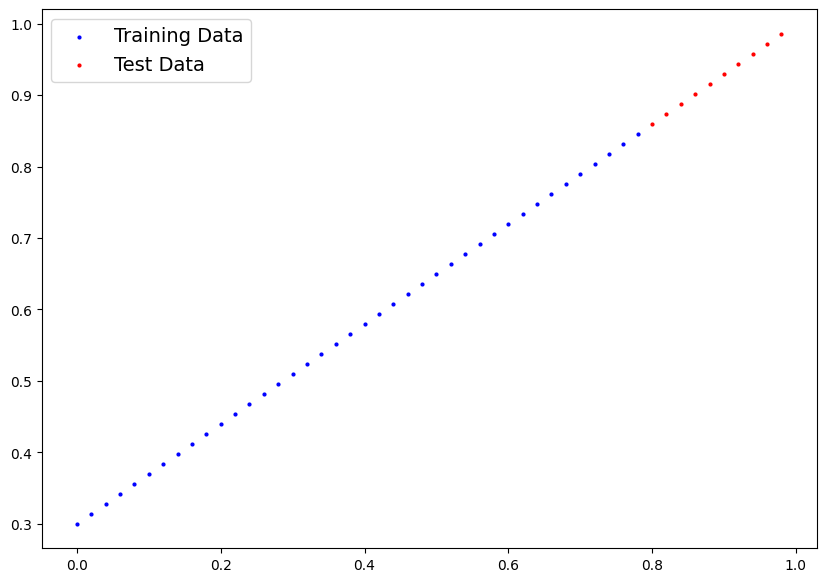

In [ ]:
plot_predictions()

In [ ]:
# Build model

# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything inherits from nn.Module

  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.rand(1, requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True))


  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight*x + self.bias


In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
# Make predictions with model using torch.inference_mode() (a lot faster)
# similar with torch.no_grad()

with torch.inference_mode(): # context manager
  y_preds = model_0(X_test)


y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

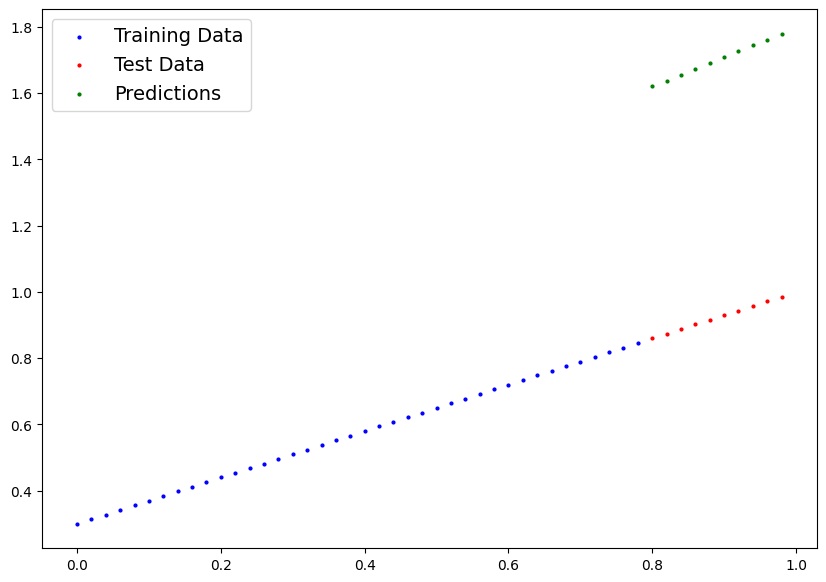

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Set up loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [ ]:
# Training Loop

# An epoch is one loop through the data
epochs = 200

# Track progress
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the training data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # training mode sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Loss function
  loss = loss_fn(y_pred,y_train)
  # print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ## Testing
  model_0.eval() # turns off gradient tracking

  with torch.inference_mode():

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    # Print out what is happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
Epoch: 30 | Loss: 0.34045934677124023 | Test loss: 0.35962313413619995
Epoch: 40 | Loss: 0.2252494841814041 | Test loss: 0.2249133139848709
Epoch: 50 | Loss: 0.1100396141409874 | Test loss: 0.09020347893238068
Epoch: 60 | Loss: 0.009724985808134079 | Test loss: 0.020998019725084305
Epoch: 70 | Loss: 0.006216754671186209 | Test loss: 0.014099234715104103
Epoch: 80 | Loss: 0.002788322512060404 | Test loss: 0.005826681852340698
Epoch: 90 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 100 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 110 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 120 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 130 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


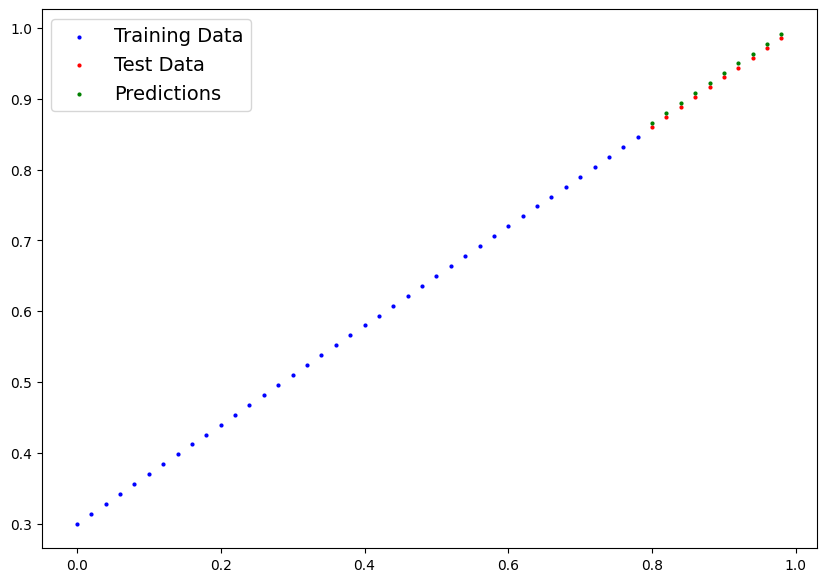

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

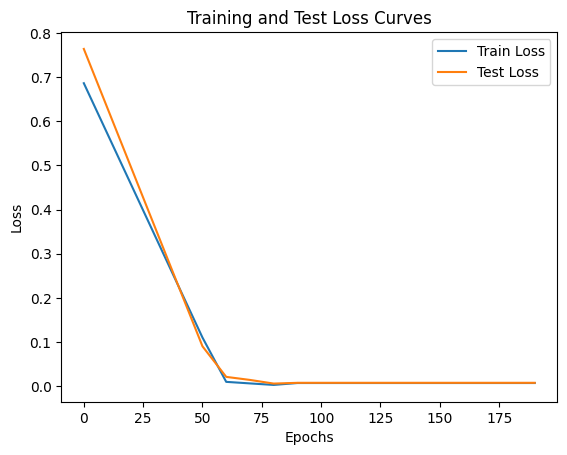

In [ ]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();



In [ ]:
# Saving our model in Pytorch

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


In [ ]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Another way to define a linear model is by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features =1,
                                  out_features=1) # implements a linear transformation

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))]))